# 11.2 COOPERATIVE BINDING DATA

Use this notebook to store your work for this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.special import binom
from numpy import random
from scipy.stats import norm

import math
from scipy.stats import stats
from scipy.special import beta
from scipy.signal import convolve
from mpl_toolkits import mplot3d
from numpy.random import default_rng
rand = default_rng().random

## (a) Fit by eye

In [4]:
blood = np.loadtxt('hemoglobin.csv', delimiter = ',')

cut = np.hsplit(blood,2)
focus = cut[0].flatten()
prob = cut[1].flatten()

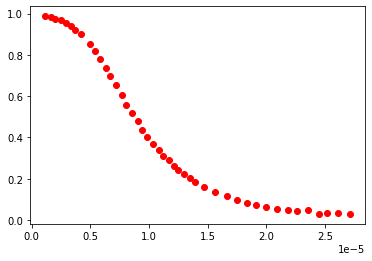

In [6]:
plt.plot(focus,prob, 'or')

In [37]:
f = focus
p = prob
k_d = .0025

c_bar = (f**p)/k_d

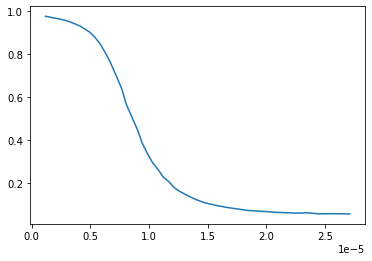

In [38]:
n = 0.5

p = 1/(1+c_bar**n)
plt.figure()
plt.plot(f,p)

In [39]:
#Looking at the axis of the graph created from the data points the axis of this graph that I created from a function matches. Additionally, I just the focus and probability characteristics from the data in the numerator to manipulte the hump into the line and use the k_d and n variables as constants in the function to create the details of the graph that the prior graph possessed.

## (b) Least-squares fit

In [49]:
A = np.vstack([f, np.ones(len(f))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(p), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=1.396881753077278, beta=-143344.2313391611


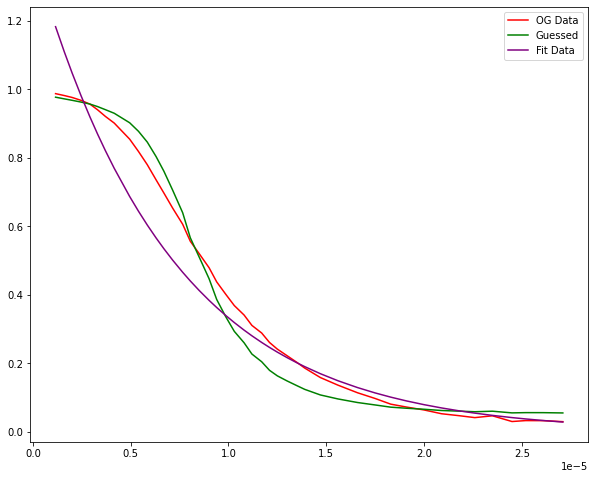

In [50]:
plt.figure(figsize = (10,8))
plt.plot(focus, prob, label = 'OG Data', color='red')
plt.plot(f,p, label = 'Guessed', color='green')
plt.plot(f, alpha*np.exp(beta*f), label = 'Fit Data',color='purple')
plt.legend(loc='upper right')